In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
from wordcloud import WordCloud
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [3]:
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm

In [5]:
import pandas as pd
import nltk
import sklearn

from nltk.collocations import *
from nltk.corpus import stopwords
# from nltk.stem import *
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
wordnet_lemmatizer = WordNetLemmatizer()
english = set(nltk.corpus.words.words())

In [55]:
df = pd.read_csv('youtubecleaned.csv')

In [56]:
df['category_name'] = np.nan

In [57]:
df.loc[(df["category_id"] == 1),"category_name"] = 'Film&Animation&Comedy'
df.loc[(df["category_id"] == 2),"category_name"] = 'Lifestyle&Travel'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Film&Animation&Comedy'
df.loc[(df["category_id"] == 17),"category_name"] = 'Gaming&Sports'
df.loc[(df["category_id"] == 19),"category_name"] = 'Lifestyle&Travel'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming&Sports'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Film&Animation&Comedy'
df.loc[(df["category_id"] == 25),"category_name"] = 'News&Politics'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 26),"category_name"] = 'Lifestyle&Travel'
df.loc[(df["category_id"] == 27),"category_name"] = 'STEM'
df.loc[(df["category_id"] == 28),"category_name"] = 'STEM'
df.loc[(df["category_id"] == 29),"category_name"] = 'STEM'

In [58]:
df.shape

(41635, 13)

## Check NAs

In [59]:
df.isna().sum()

Unnamed: 0         0
category_id      394
channel_title    394
comment_count    394
description      967
likes            486
dislikes         486
tags             490
title            578
trending_date    578
video_id         578
views            774
category_name    543
dtype: int64

In [60]:
df.dropna(how = 'all')

,Unnamed: 0,category_id,channel_title,comment_count,description,likes,dislikes,tags,title,trending_date,video_id,views,category_name
0,0,22.0,CaseyNeistat,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,57527,2966,SHANtell martin,WE WANT TO TALK ABOUT OUR MARRIAGE,17.14.11,2kyS6SvSYSE,748374.0,People and Blogs
1,1,24.0,LastWeekTonight,12703,"One year after the presidential election, John...",97185,6146,"last week tonight trump presidency|""last week ...",The Trump Presidency: Last Week Tonight with J...,17.14.11,1ZAPwfrtAFY,2418783.0,Entertainment
2,2,23.0,Rudy Mancuso,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,146033,5339,"racist superman|""rudy""|""mancuso""|""king""|""bach""...","Racist Superman | Rudy Mancuso, King Bach & Le...",17.14.11,5qpjK5DgCt4,3191434.0,Film&Animation&Comedy
3,3,24.0,Good Mythical Morning,2146,Today we find out if Link is a Nickelback amat...,10172,666,"rhett and link|""gmm""|""good mythical morning""|""...",Nickelback Lyrics: Real or Fake?,17.14.11,puqaWrEC7tY,343168.0,Entertainment
4,4,24.0,nigahiga,17518,I know it's been a while since we did this sho...,132235,1989,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I Dare You: GOING BALD!?,17.14.11,d380meD0W0M,2095731.0,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41630,195,15.0,Brave Wilderness,3245,"On this episode of Blue Wilderness, Mark and t...",47246,1495,sharks|shark|great white shark|brave wildernes...,Entering Kill Zone with Great White Sharks!,19.08.12,bdep2hOWDc8,NaN,Film&Animation&Comedy
41631,196,28.0,Unbox Therapy,10632,Smartphone cases don't have to ruin your phone...,60835,29285,latercase|later case|phone case|thin phone cas...,Don't Ruin Your Smartphone,19.08.12,s0wKAHQI8XU,NaN,STEM
41632,197,24.0,A&E,2403,Stay up to date on all of A&E's latest premier...,14699,649,a&e|aetv|a&e tv|ae|a&e television|a&e shows|a ...,"Live PD: Best of Lake County, Illinois Sheriff...",19.08.12,ZLuxpDxhHYA,NaN,Entertainment
41633,198,10.0,FabolousVEVO,3075,Summertime Shootout 3 is out now! Download & s...,42486,1012,Fabolous|B.O.M.B.S.|Def|Jam|Recordings|Hip|Hop,Fabolous - B.O.M.B.S.,19.08.12,yr_qQmvE4bU,NaN,Music


## Data Cleaning = Dealing with NAs

In [61]:
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df = df.dropna(subset=['views'])
df['views']= df['views'].astype(int)


In [62]:
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df = df.dropna(subset=['views'])
df['likes']= df['likes'].astype(int)

In [63]:
df['dislikes'] = pd.to_numeric(df['dislikes'], errors='coerce')
df = df.dropna(subset=['dislikes'])
df['dislikes']= df['dislikes'].astype(int)

In [64]:
df['comment_count'] = pd.to_numeric(df['comment_count'], errors='coerce')
df = df.dropna(subset=['comment_count'])
df['comment_count']= df['comment_count'].astype(int)

## tranform likes comments count into log

In [65]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)


In [66]:
df['likes_log'] = np.round(df['likes_log'],decimals =2)
df['views_log'] = np.round(df['views_log'],decimals =2)
df['dislikes_log'] = np.round(df['dislikes_log'],decimals =2)
df['comment_log'] = np.round(df['comment_log'],decimals =2)


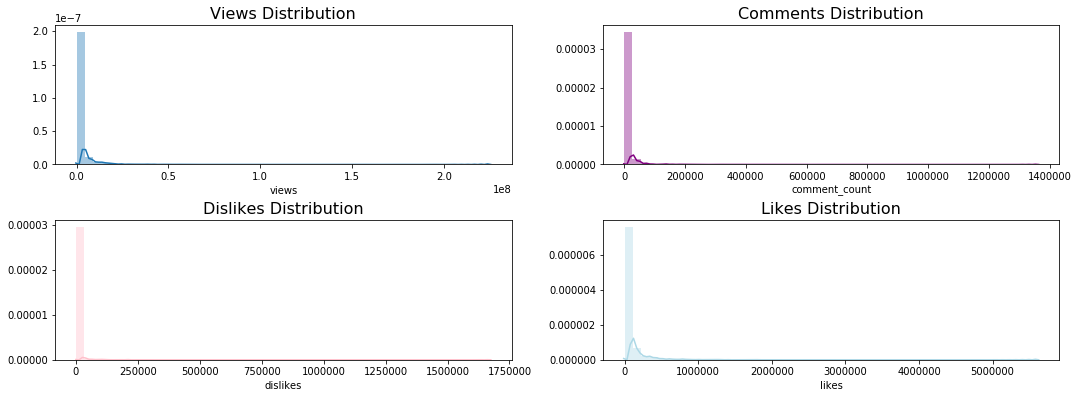

In [67]:
plt.figure(figsize = (18,6))

plt.subplot(221)
g1 = sns.distplot(df['views'])
g1.set_title("Views Distribution", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df['likes'],color='lightblue')
g2.set_title('Likes Distribution', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes'], color='pink')
g3.set_title("Dislikes Distribution", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df['comment_count'], color='purple')
g4.set_title("Comments Distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

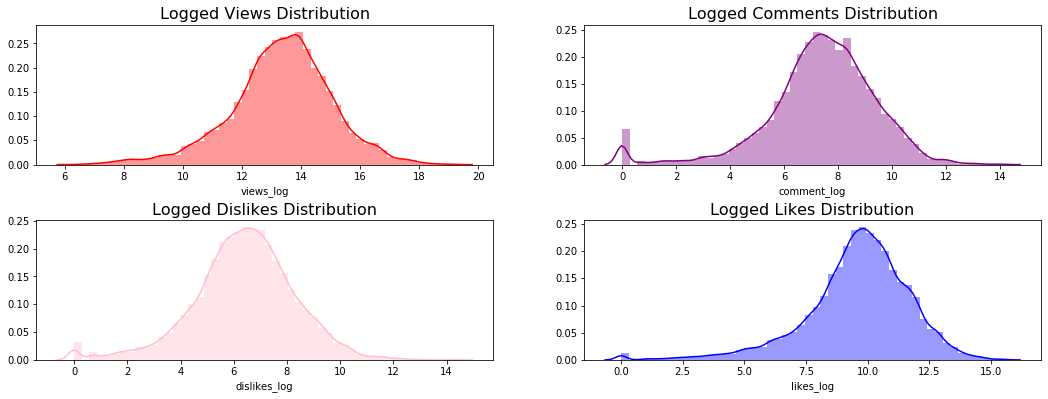

In [71]:
plt.figure(figsize = (18,6))

plt.subplot(221)
g1 = sns.distplot(df['views_log'],color='red')
g1.set_title("Logged Views Distribution", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df['likes_log'],color='blue')
g2.set_title('Logged Likes Distribution', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color='pink')
g3.set_title("Logged Dislikes Distribution", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df['comment_log'], color='purple')
g4.set_title("Logged Comments Distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [73]:
# Select all duplicate rows based on one column
dropped = df.drop_duplicates(['video_id'], keep = "last")

In [74]:
dropped

,Unnamed: 0,category_id,channel_title,comment_count,description,likes,dislikes,tags,title,trending_date,video_id,views,category_name,likes_log,views_log,dislikes_log,comment_log
10,10,17.0,NFL,177,New England Patriots returner Dion Lewis blast...,655,25,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,17.14.11,9wRQljFNDW8,81377,Gaming&Sports,6.49,11.31,3.26,5.18
36,36,1.0,Screen Junkies,2111,With Justice League approaching fast we rewatc...,7515,792,"screenjunkies|""screen junkies""|""sj news""|""hone...",TL;DW - Every DCEU Movie Before Justice League,17.14.11,Om_zGhJLZ5U,288922,Film&Animation&Comedy,8.92,12.57,6.68,7.66
41,41,25.0,BBC News,413,A strong 7.2-magnitude earthquake has rattled ...,308,26,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",Iraq-Iran earthquake: Deadly tremor hits borde...,17.14.11,goP4Z5wyOlM,34785,News&Politics,5.73,10.46,3.30,6.03
58,55,24.0,The Graham Norton Show,605,I think Sarah Millican was very excited for th...,16116,236,"Graham Norton|""Graham Norton Show Official""|""E...",Jason Momoa Wows Hugh Grant With Some Dothraki...,17.14.11,8NHA23f7LvU,1496225,Entertainment,9.69,14.22,5.47,6.41
79,76,28.0,Mayo Clinic,260,One and a half years after the surgery that tr...,1896,74,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",Mayo Clinic's first face transplant patient me...,17.14.11,IE-xepGLVt8,237307,STEM,7.55,12.38,4.32,5.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41410,40944,15.0,AaronsAnimals,2657,The Cat Who Caught the Laser - Aaron's Animals,38160,1385,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",The Cat Who Caught the Laser,18.14.06,BZt0qjTWNhw,1685609,Film&Animation&Comedy,10.55,14.34,7.23,7.89
41411,40945,22.0,zefrank1,3936,NaN,60008,382,[none],True Facts : Ant Mutualism,18.14.06,1h7KV2sjUWY,1064798,People and Blogs,11.00,13.88,5.95,8.28
41412,40946,24.0,Brad Mondo,3992,I had so much fun transforming Safiyas hair in...,48068,1032,I gave safiya nygaard a perfect hair makeover ...,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,18.14.06,D6Oy4LfoqsU,1066451,Entertainment,10.78,13.88,6.94,8.29
41413,40947,1.0,How It Should Have Ended,13088,How Black Panther Should Have EndedWatch More ...,192957,2846,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",How Black Panther Should Have Ended,18.14.06,oV0zkMe1K8s,5660813,Film&Animation&Comedy,12.17,15.55,7.95,9.48


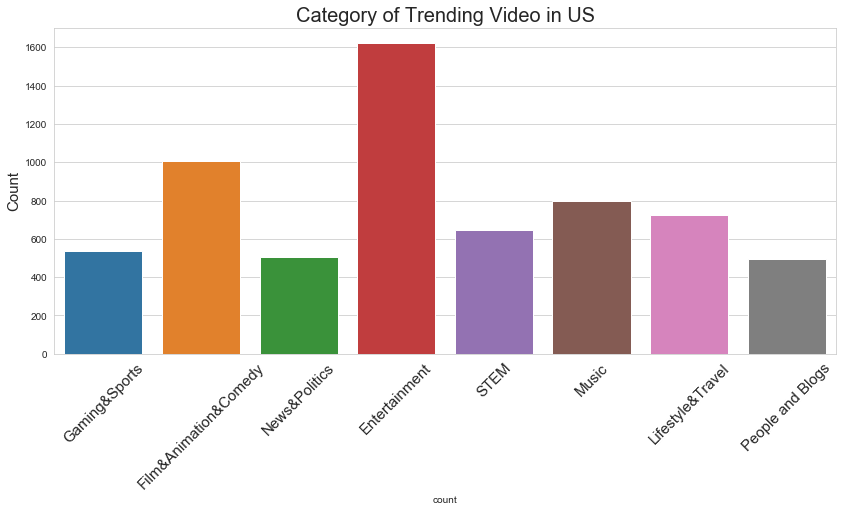

In [94]:
plt.figure(figsize = (14,6))
g = sns.countplot(x='category_name', data=dropped)
g.set_xticklabels(g.get_xticklabels(),rotation=45, fontsize =15)
g.set_title("Category of Trending Video in US", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xlabel("count")
g.set_title("Category of Trending Video in US", fontsize = 20)
plt.show()

In [77]:
import plotly.figure_factory as ff

In [83]:
hist_data = [df["dislikes_log"].values, df["likes_log"].values]

group_labels = ['Dislikes log distribution', 'Likes log distribution']
colors = ['#A6ACEC', '#63F5EF']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=0.5, show_rug=False)

# Add title
fig['layout'].update(title='Likes vs dislikes', legend=dict(x=0.65, y=0.8))

# Plot!
fig

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displaying Itself"
)
fig

In [299]:
df.groupby(['channel_title'])['likes_log'].agg()

Text(0.5, 1.0, 'Catogories of trend videos in US')

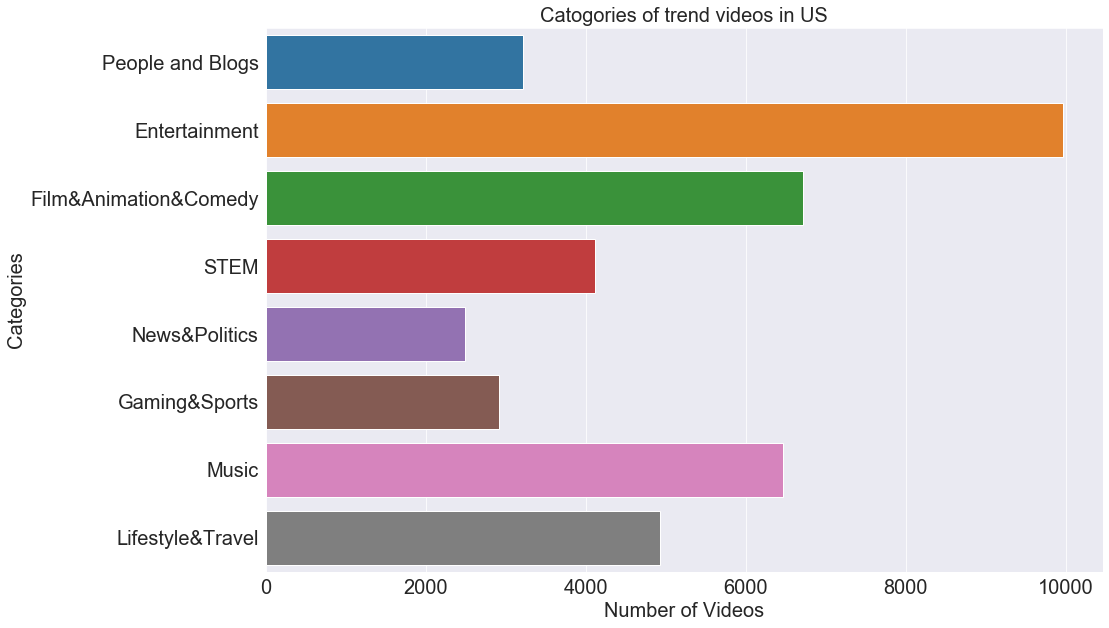

In [106]:
cat_df_us = dropped['category_name'].value_counts().reset_index()
plt.figure(figsize=(15,10))
ax = sns.countplot(y=df['category_name'], data=dropped,orient='v')
plt.xticks(size =20)
plt.yticks(size = 20)
plt.xlabel("Number of Videos",fontsize =20)
plt.ylabel("Categories",fontsize =20)
plt.title("Catogories of trend videos in US",fontsize =20)

In [ ]:
fig = df[['Like', 'energy']].iplot(kind='hist', color=['purple', 'blue'], xTitle='Danceability',
                  yTitle='Frequency', title='Danceability Histogram')

In [119]:
dislike_like_ratio = dropped.groupby('category_name')['dislikes_log'].agg('sum') / dropped.groupby('category_name')['likes_log'].agg('sum')

dislike_like_ratio = dislike_like_ratio.sort_values(ascending=False).reset_index()

dislike_like_ratio.columns = ['category','dislikeratio']



,category,ratio
0,Lifestyle&Travel,0.008360
1,Film&Animation&Comedy,0.005214
2,News&Politics,0.004595
3,STEM,0.004372
4,People and Blogs,0.003282
5,Gaming&Sports,0.003237
6,Entertainment,0.002183
7,Music,0.001579


In [122]:
likedislikedf = pd.merge(dislike_like_ratio,like_dislike_ratio)

In [125]:
likedislikedf

,category,dislikeratio,likeratio
0,News&Politics,0.775786,0.004595
1,Gaming&Sports,0.671832,0.003237
2,Entertainment,0.670186,0.002183
3,Music,0.649358,0.001579
4,Film&Animation&Comedy,0.649355,0.005214
5,People and Blogs,0.636449,0.003282
6,STEM,0.631815,0.004372
7,Lifestyle&Travel,0.624095,0.008360


TypeError: unsupported operand type(s) for -: 'str' and 'int'

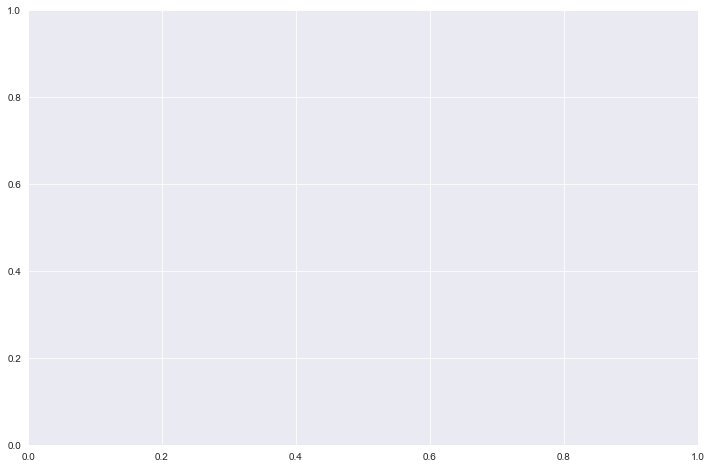

In [132]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(likedislikedf.category.unique())

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.6

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, likedislikedf['dislikeratio'] ,
            width=bar_width)
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, likedislikedf['likeratio'],
            width=bar_width)

ValueError: Could not interpret input 'ratio'

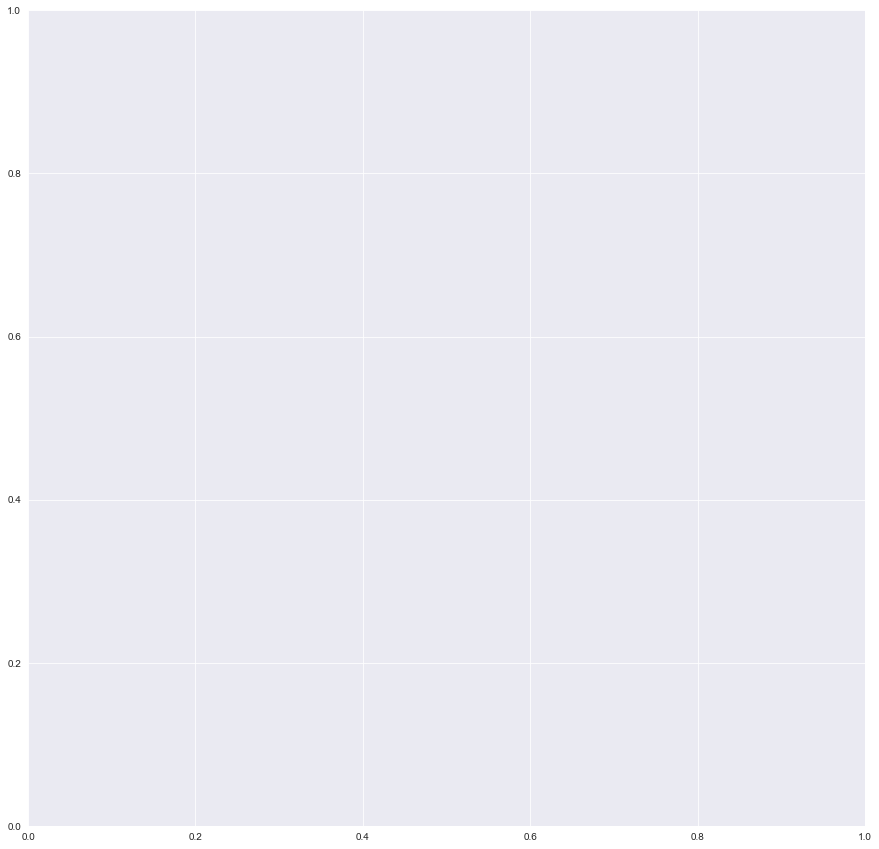

In [120]:
like_dislike_ratio = dropped.groupby('category_name')['likes_log'].agg('sum') / dropped.groupby('category_name')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['category','likeratio']
plt.subplots(figsize=(15, 15))
sns.barplot(x="ratio", y="category", data=like_dislike_ratio,
            label="Likes-Dislikes Ratio", color="pink")

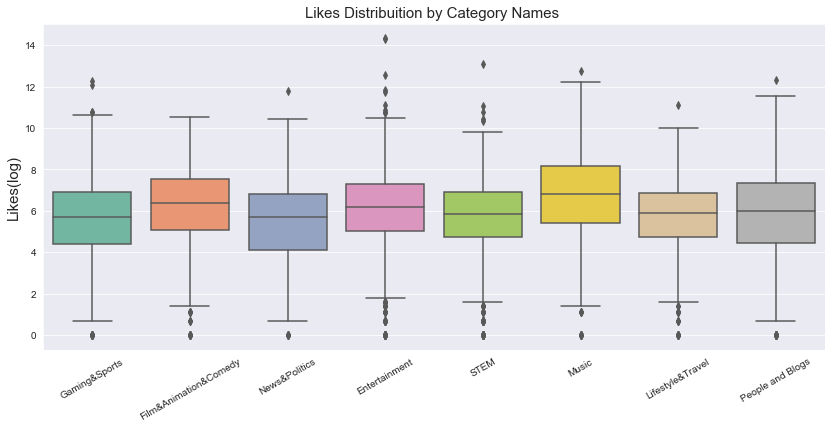

In [111]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=dropped, palette="Set2")
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Likes(log)", fontsize=15)
plt.show()

In [302]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(dropped.category_name.unique()))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, dropped.loc[df['sex'] == 'men', 'count'],
            width=bar_width)
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, df.loc[df['sex'] == 'women', 'count'],
            width=bar_width)

,Unnamed: 0,category_id,channel_title,comment_count,description,likes,dislikes,tags,title,trending_date,...,likes_log,views_log,dislikes_log,comment_log,title_wordcnt,tag_word_count,title_uniquewordcnt,tag_uniquewordcnt,newid,catId
0,0,22.0,CaseyNeistat,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,57527,2966,SHANtell martin,WE WANT TO TALK ABOUT OUR MARRIAGE,17.14.11,...,10.96,13.53,8.00,9.68,7,2,7,2,0,0
1,1,24.0,LastWeekTonight,12703,"One year after the presidential election, John...",97185,6146,"last week tonight trump presidency|""last week ...",The Trump Presidency: Last Week Tonight with J...,17.14.11,...,11.48,14.70,8.72,9.45,10,12,10,10,1,1
2,2,23.0,Rudy Mancuso,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,146033,5339,"racist superman|""rudy""|""mancuso""|""king""|""bach""...","Racist Superman | Rudy Mancuso, King Bach & Le...",17.14.11,...,11.89,14.98,8.58,9.01,10,19,10,19,2,2
3,3,24.0,Good Mythical Morning,2146,Today we find out if Link is a Nickelback amat...,10172,666,"rhett and link|""gmm""|""good mythical morning""|""...",Nickelback Lyrics: Real or Fake?,17.14.11,...,9.23,12.75,6.50,7.67,5,34,5,28,1,1
4,4,24.0,nigahiga,17518,I know it's been a while since we did this sho...,132235,1989,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I Dare You: GOING BALD!?,17.14.11,...,11.79,14.56,7.60,9.77,5,4,5,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41410,40944,15.0,AaronsAnimals,2657,The Cat Who Caught the Laser - Aaron's Animals,38160,1385,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",The Cat Who Caught the Laser,18.14.06,...,10.55,14.34,7.23,7.89,6,3,6,3,2,2
41411,40945,22.0,zefrank1,3936,NaN,60008,382,[none],True Facts : Ant Mutualism,18.14.06,...,11.00,13.88,5.95,8.28,5,1,5,1,0,0
41412,40946,24.0,Brad Mondo,3992,I had so much fun transforming Safiyas hair in...,48068,1032,I gave safiya nygaard a perfect hair makeover ...,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,18.14.06,...,10.78,13.88,6.94,8.29,14,51,14,40,1,1
41413,40947,1.0,How It Should Have Ended,13088,How Black Panther Should Have EndedWatch More ...,192957,2846,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",How Black Panther Should Have Ended,18.14.06,...,12.17,15.55,7.95,9.48,6,15,6,15,1,1


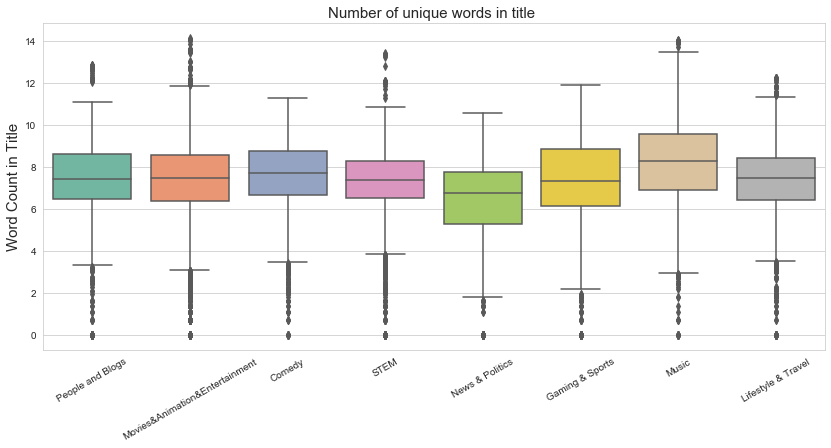

In [304]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df, palette="Set2")
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.set_title("Number of unique words in title ", fontsize=15)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Word Count in Title", fontsize=15)
plt.show()

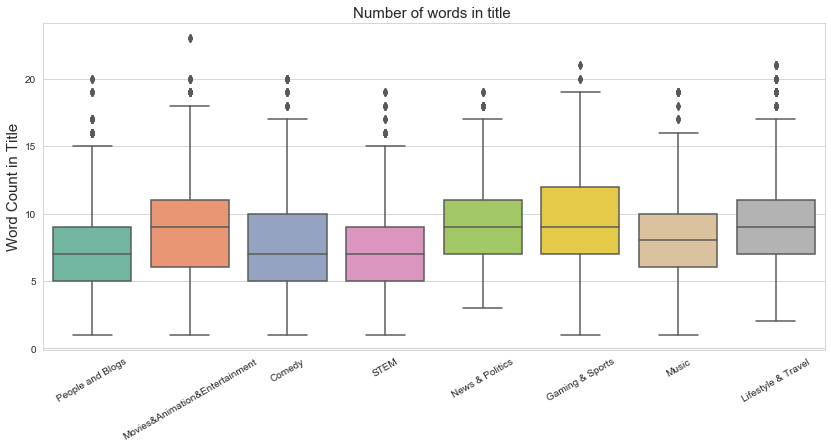

In [301]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='title_wordcnt', data=df, palette="Set2")
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.set_title("Number of words in title ", fontsize=15)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Word Count in Title", fontsize=15)
plt.show()

In [134]:
#Word count in each comment:
dropped['title_wordcnt']=dropped["title"].apply(lambda x: len(str(x).split()))
dropped['tag_word_count']=dropped["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
dropped['title_uniquewordcnt']=dropped["title"].apply(lambda x: len(set(str(x).split())))
dropped['tag_uniquewordcnt']=dropped["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count
#df['title_lettercnt']=df["title"].apply(lambda x: len(str(x)))
#df['tag_lettercnt']=df["tags"].apply(lambda x: len(str(x)))

#Average length of the words
#df["title_avg_lenword"] = df["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#df["tag_avg_lenword"] = df["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [135]:
dropped.to_csv('dropped.csv')

In [136]:
dropped

,Unnamed: 0,category_id,channel_title,comment_count,description,likes,dislikes,tags,title,trending_date,...,views,category_name,likes_log,views_log,dislikes_log,comment_log,title_wordcnt,tag_word_count,title_uniquewordcnt,tag_uniquewordcnt
10,10,17.0,NFL,177,New England Patriots returner Dion Lewis blast...,655,25,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,17.14.11,...,81377,Gaming&Sports,6.49,11.31,3.26,5.18,16,8,15,8
36,36,1.0,Screen Junkies,2111,With Justice League approaching fast we rewatc...,7515,792,"screenjunkies|""screen junkies""|""sj news""|""hone...",TL;DW - Every DCEU Movie Before Justice League,17.14.11,...,288922,Film&Animation&Comedy,8.92,12.57,6.68,7.66,8,33,8,31
41,41,25.0,BBC News,413,A strong 7.2-magnitude earthquake has rattled ...,308,26,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",Iraq-Iran earthquake: Deadly tremor hits borde...,17.14.11,...,34785,News&Politics,5.73,10.46,3.30,6.03,10,6,10,6
58,55,24.0,The Graham Norton Show,605,I think Sarah Millican was very excited for th...,16116,236,"Graham Norton|""Graham Norton Show Official""|""E...",Jason Momoa Wows Hugh Grant With Some Dothraki...,17.14.11,...,1496225,Entertainment,9.69,14.22,5.47,6.41,13,29,13,22
79,76,28.0,Mayo Clinic,260,One and a half years after the surgery that tr...,1896,74,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",Mayo Clinic's first face transplant patient me...,17.14.11,...,237307,STEM,7.55,12.38,4.32,5.56,9,20,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41410,40944,15.0,AaronsAnimals,2657,The Cat Who Caught the Laser - Aaron's Animals,38160,1385,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",The Cat Who Caught the Laser,18.14.06,...,1685609,Film&Animation&Comedy,10.55,14.34,7.23,7.89,6,3,6,3
41411,40945,22.0,zefrank1,3936,NaN,60008,382,[none],True Facts : Ant Mutualism,18.14.06,...,1064798,People and Blogs,11.00,13.88,5.95,8.28,5,1,5,1
41412,40946,24.0,Brad Mondo,3992,I had so much fun transforming Safiyas hair in...,48068,1032,I gave safiya nygaard a perfect hair makeover ...,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,18.14.06,...,1066451,Entertainment,10.78,13.88,6.94,8.29,14,51,14,40
41413,40947,1.0,How It Should Have Ended,13088,How Black Panther Should Have EndedWatch More ...,192957,2846,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",How Black Panther Should Have Ended,18.14.06,...,5660813,Film&Animation&Comedy,12.17,15.55,7.95,9.48,6,15,6,15


In [137]:
df = pd.read_csv('dropped.csv')

# Text Processing of the titles

In [138]:
def preprocess_text(text):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL', text)
    text = re.sub('@[^\s]+','USER', text)
    text = text.lower().replace("ё", "е")
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +',' ', text)
    return text.strip()
clean_sentences = [preprocess_text(t) for t in df['title']]


In [139]:
clean_sentences[0].split()

['dion',
 'lewis',
 '1',
 '3',
 'yd',
 'kick',
 'return',
 'td',
 'vs',
 'denver',
 'can',
 't',
 'miss',
 'play',
 'nfl',
 'wk',
 '1',
 'highlights']

In [140]:
cleaned_sentences = []
for words in clean_sentences:
    word = words.split()
    allowed_words = []
    for w in word:
        if w in stop_words:
            continue
        allowed_words.append(w)
    cleaned_sentences.append(' '.join(allowed_words))
    

NameError: name 'stop_words' is not defined

In [155]:
vec = CountVectorizer()
X = vec.fit_transform(cleaned_sentences)
dffeatures = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [157]:
tfidf = TfidfVectorizer()

In [159]:
response = tfidf.fit_transform(cleaned_sentences)

In [160]:
tfidf_df = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names())

In [161]:
tfidf_df.head()

,11,111,11foot8,12,1211,1214,122,1224,125,126p,...,одразу,олигархи,охотница,разоблачает,разошлись,сhat,села,сход,укра,яхты
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
unique_words = list(dffeatures.columns.values)

In [163]:
word_sums = [(word, dffeatures[word].sum()) for word in unique_words]

In [164]:
from operator import itemgetter
word_sums.sort(key=itemgetter(1), reverse=True)

In [203]:
word_sums[1]

('video', 2864)

In [166]:
relevant = []
for word in unique_words:
    if tfidf_df[word].mean() > 0.001:
        relevant.append(tfidf_df[word])
len(relevant)

364

In [167]:
relevant_df = pd.DataFrame(relevant).transpose()
relevant_df.head()

,11,13,14,15,16,17,18,24,4k,acoustic,...,white,wild,wired,without,world,wrong,year,years,young,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## get rid of the numbers and youtube

In [186]:
relevant_df = relevant_df.iloc[:,9:363]

In [187]:
relevant_df.to_csv('tokens.csv')# tokens as the features

In [215]:
relevant_df = pd.read_csv('tokens.csv')

In [216]:
relevant_df = relevant_df.reset_index()

In [201]:
df['category_name']

0                      People and Blogs
1        Movies&Animation&Entertainment
2                                Comedy
3        Movies&Animation&Entertainment
4        Movies&Animation&Entertainment
                      ...              
41410                            Comedy
41411                  People and Blogs
41412    Movies&Animation&Entertainment
41413    Movies&Animation&Entertainment
41414                   Gaming & Sports
Name: category_name, Length: 40861, dtype: object

In [208]:
df['catId'] = pd.factorize(df.category_name)[0]

In [310]:
from nltk import sent_tokenize, word_tokenize


In [311]:
tags_word = df[df['category_name']=='News & Politics']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

NameError: name 'en_stopwords' is not defined

In [210]:
newdf = df[['category_name','catId','likes_log','views_log','dislikes_log','comment_log','title_wordcnt','tag_word_count']]

In [211]:
newdf.reset_index(drop = True, inplace = True)

In [220]:
newdf = newdf.reset_index()

In [221]:
newdf.shape

(40861, 9)

In [237]:
relevant_df.shape

(40861, 355)

In [120]:
finaldf = pd.merge(newdf,relevant_df, on = 'index')

In [248]:
newcor = newdf.iloc[:,3:].corr()

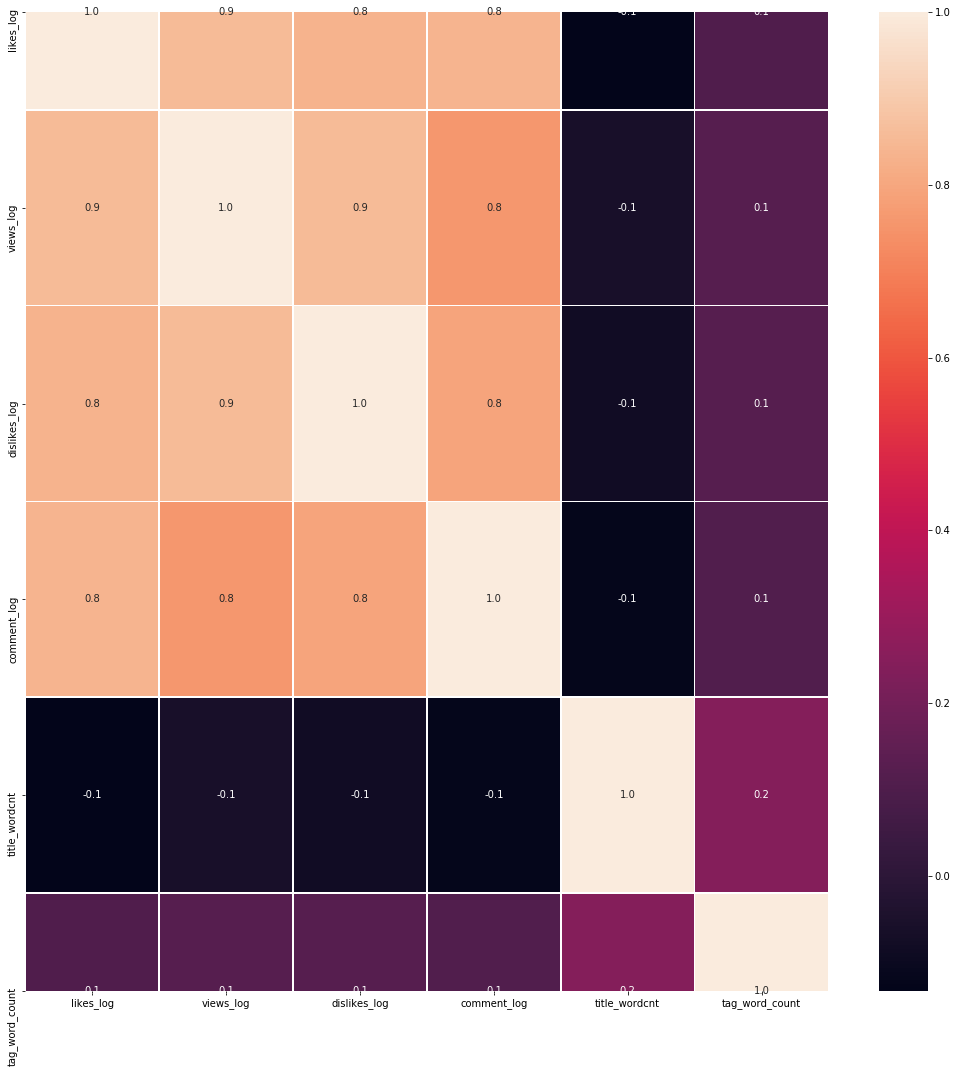

In [271]:
f,ax = plt.subplots(figsize=(18, 18))

sns.heatmap(newcor, annot=True, linewidths=.5, fmt= '.1f',ax=ax)


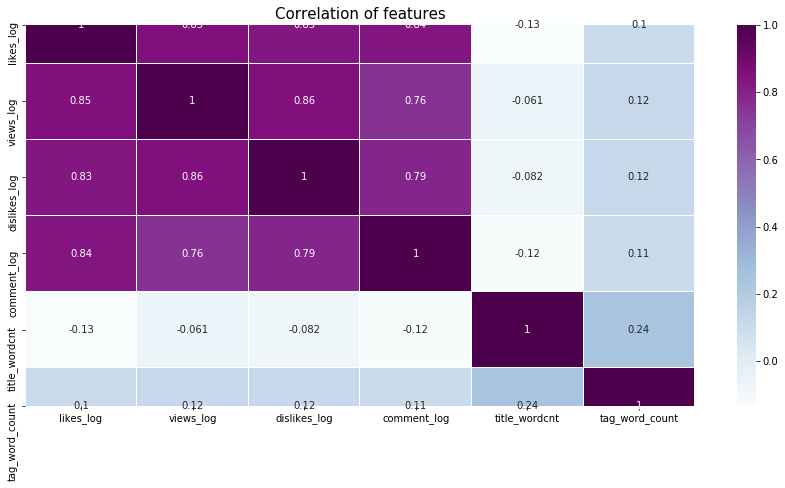

In [272]:
plt.figure(figsize=(15,7))
plt.title('Correlation of features',y=1,size=15)
sns.heatmap(newcor,linewidths=0.1,vmax=1.0,square=False,cmap="BuPu",
           linecolor='white',annot=True)

In [222]:
groupeddf = pd.merge(newdf, relevant_df, on = 'index')

In [223]:
groupeddf.to_csv('grouped.csv')

In [121]:
finaldf.to_csv('youtubefinaladded.csv')

In [65]:
df2 = newdf[['channel_title','category_id','category_name']]

In [69]:
df2 = df2.reset_index()

In [70]:
tokensby = pd.merge(df2,relevant_df, on = 'index')

In [79]:
tokensby = tokensby.drop(['Unnamed: 0'],axis =1)

In [90]:
tokensby

,index,channel_title,category_id,category_name,acoustic,actually,ad,adam,amazon,america,...,went,white,wild,wired,without,world,wrong,year,years,young
0,0,CaseyNeistat,22.0,People and Blogs,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,LastWeekTonight,24.0,Entertainment,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Rudy Mancuso,23.0,Comedy,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Good Mythical Morning,24.0,Entertainment,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,nigahiga,24.0,Entertainment,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40856,40856,AaronsAnimals,15.0,Pets and Animals,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40857,40857,zefrank1,22.0,People and Blogs,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40858,40858,Brad Mondo,24.0,Entertainment,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40859,40859,How It Should Have Ended,1.0,Film and Animation,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
